# <font color=blue>Breaking the Solar System</font>
### <font color=green>And other ways simulations help us understand the Universe</font>

<sub>Created by Rachel Smullen and Christine O'Donnell in Spring 2020.</sub>

In this computer activity, we're going to run simulations of planetary systems in order to understand how stable the Solar System is. Would the Solar System look the same if everything was 10 times more massive? What about if the planets were spaced closer together? Farther apart? 

We hope that, by the end of today's activity, you'll have the answers! 


The type of simulations we're running here are called **N-body simulations** because they use the gravitational force between bodies to predict the positions of those bodies in the future.  Remember that the gravitational force between two bodies is defined as 

$$
 F = \frac{-Gm_1m_2}{r^2}
$$

where $G$ is the gravitational constant, $m_1$ is the mass of one body, $m_2$ is the mass of the other body, and $r$ is the distance between bodies. If the objects are closer, or if one of the bodies is massive, the force will be larger, leading to larger tugs between bodies that can make some crazy things happen.

<font color=red>**For the rest of this notebook, your tasks will always be bold and red like this.**</font>

This activity is designed to be used in conjunction with the worksheet in this folder.
___

## <font color=blue>How to Use This Notebook</font>

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it. It will be outlined in a green box if it is selected.

<font color=red>**Select the cell below and read its contents.**</font>

In [1]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard.<br>
If you accidentally double click on a text cell and it looks like a code cell, use `[Shift + Enter]` to put it back to normal. 

<font color=red>**Select the cell below and read its contents. Then, run the cell.**</font>

In [2]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Congrats! You have successfully run your first cell!


Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.  If the code is still in progress, the input cell will look like `In [*]:`.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/

___
#### <font color=blue>Before we start simulating</font>
We need to load the software we'll use in this activity. We're using a really nice simulation package called `Rebound` that does most of the hard work for us.  The first rule of writing new software is that it has to have a good name!
<font color=red>**Run the cell below.**</font>

In [3]:
# Software loading
# DO NOT CHANGE ANYTHING IN THIS CELL

# Simulation package
import rebound

# Math packages
from numpy import *

# Plotting packages and settings
import matplotlib.pyplot as plt
plt.rcParams['animation.html']='jshtml'
plt.rcParams['animation.embed_limit']=1024
%matplotlib inline

# Behind-the-scenes tools to simplify code
%run Files/tools.ipynb 

___
## <font color=blue>Simulate a Single Planet</font>

There are four steps to running a simulation of a planetary system.  This section walks you through each piece of the puzzle.

<font color=red><b>Run each of the code cells below when you understand what it does.</b></font>

<font color=green>1\. First, we need to **create a Rebound simulation** </font>

We'll add all of our stars and planets to this simulation object.

In [4]:
mysim = initialize_simulation() # This will create a simulation called 'mysim'

<font color=green>2\. Next, we need to **add a central star** for our planets to orbit.  We must specify the star's _mass_ and _name_. The star should always be the first object added to the simulation.</font>

The star's mass must have units of **solar masses** (units where the Sun's mass is 1) and can have any name you want (as long as it is surrounded by quotation marks `"` or `'`)

In [5]:
add_star(mysim,name='star',mass=1.0) # add a star to mysim, with mass in units of solar masses

<font color=green>3\. Then, we need to **add our planet(s)**.  Planets must have a *mass*, *name*, and *semi-major axis*. Each planet requires its own line</font>

Planets can also have an *eccentricity*, *inclination*, *argument of perihelion*, *longitude of ascending node*, and *true anomaly*, but these values default to 0 if not specified. Remember that these quantities are described on your worksheet. The values $i$, $\omega$, $\Omega$ and $f$ all have units of degrees ($0-360^\circ$). You can specify as many or as few of these quantities as needed.

The planet's mass must be in units of **Jupiter masses** (units where the mass of Jupiter is 1), and the semi-major axis must have units in **astronomical units (AU)** (units where the distance between the Sun and Earth is 1). Again, the name must be wrapped in quotation marks.

As an aside: Jupiter's mass is ${\approx}1/1000$ times that of the Sun. Earth's mass is ${\approx}\frac{1}{300}$ times that of Jupiter, or $\frac{1}{300{,}000}$ times the mass of the Sun. 

In [6]:
add_planet(mysim,name='planet',mass=1,a=1) # add a planet to mysim with mass in Jupiter masses and a in AU

<font color=green>4\. Finally, we need to **run our simulation** for an amount of time that we specify with the variable *end\_time*.  This piece of code returns a movie of the orbits that we can look at by typing the movie's name. It also returns a plot of the semi-major axis, distance from the star, and eccentricity as a function of time</font>

Time in the simulation is measured in **years**.  <font color=red>This step can take a while! The code is running if you see `In [*]:`</font>

Progress:   0%|          | 0/10 [00:00<?, ?it/s]

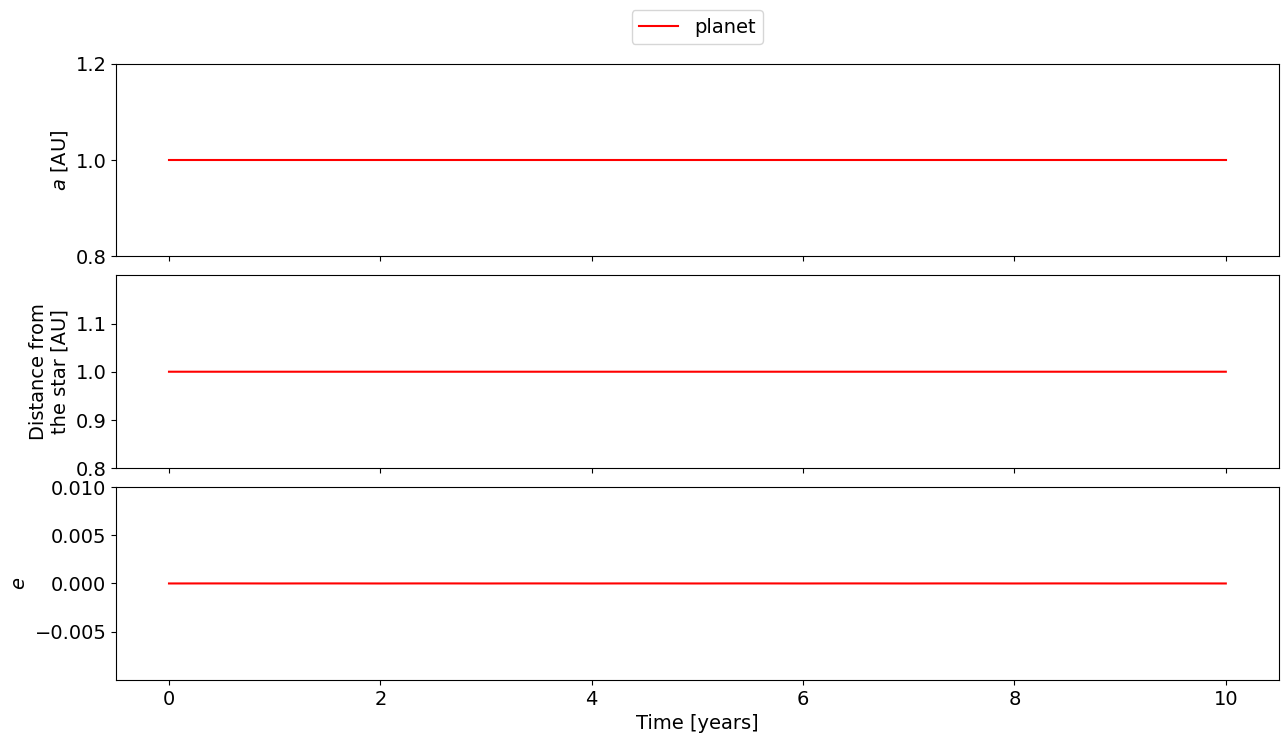

In [7]:
movie = run_simulation(mysim,end_time=10) # run mysim for 10 years
movie # show the movie

<font color=green>There are some things you should notice that may be helpful in the next steps.</font>

First, while the simulation was running, you should have seen a progress bar with some numbers off to the side. The progress bar is to help you see the status of your simulation.  For very short simulations, the simulation may run too fast for the progress bar to show up. The meaning of the numbers are shown in the picture below.  In particular, the "% Done" and "Time Remaining" numbers are quite useful.

<img src="./Files/progress.jpeg" style="width: 600px;">

Second, you have a movie to play with that shows a "top down" view of our planetary system.  The controls of the movie are shown in the picture below.

<img src="./Files/movie.jpeg" style="width: 500px;">

Sometimes the movies may appear to run backward or stay stationary.  This is called the ["wagon wheel effect"](https://en.wikipedia.org/wiki/Wagon-wheel_effect).  If the planet appears to stay still, the frames in the movie are being output once every time the planet goes around the star an integer number of times.  If the planet appears to move backward, the frames are being output when the planet goes around more than once but less than twice (or an integer multiple of that) between frames.

<font color=green>**Before we go any further**</font>, know that we can put all of the code into one cell to make things simpler. An example is shown below. <font color=red> You do _not_ need to run this code.</font>

Progress:   0%|          | 0/100 [00:00<?, ?it/s]

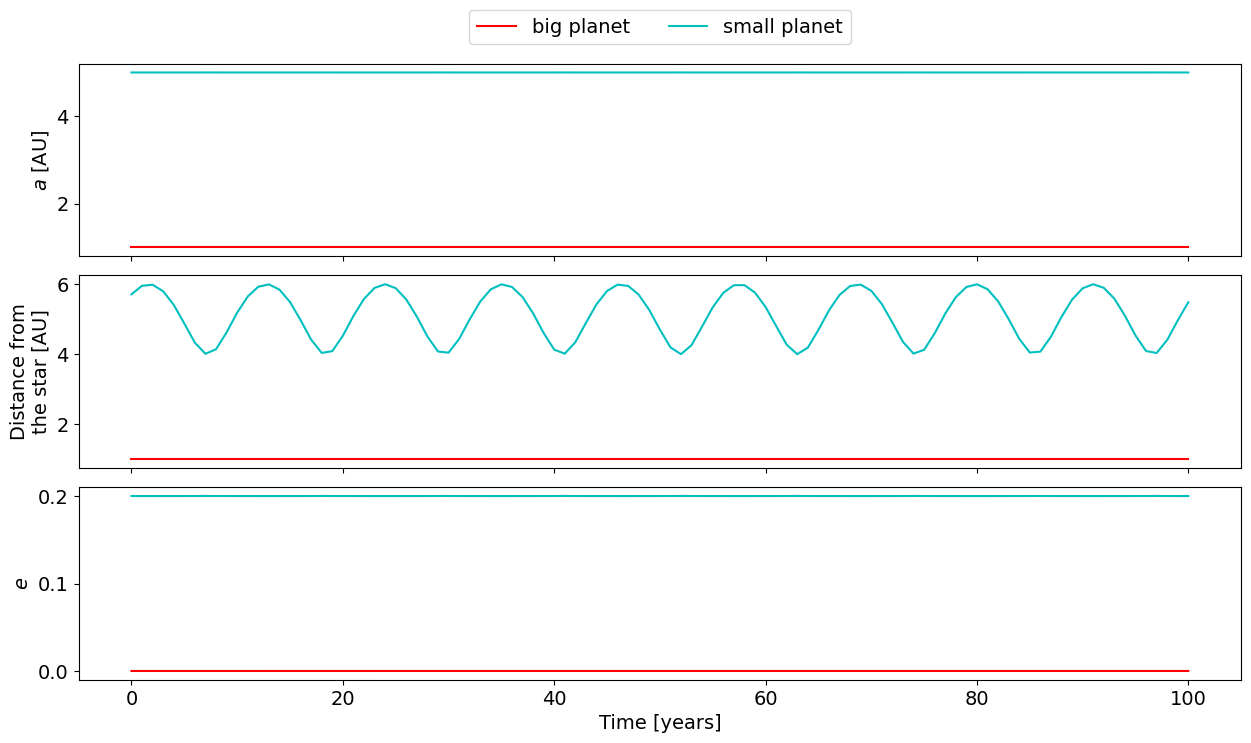

In [8]:
# Create simulation
mysim = initialize_simulation()

# Add a star
add_star(mysim, name='Sun', mass=1.0)

# Add some planets
add_planet(mysim, name='big planet', mass=1, a=1) # a Jupiter at 1 AU
add_planet(mysim, name='small planet', mass=1/300, a=5, e=0.2, i=10, omega=180, Omega=90, f=143) # an eccentric Earth at 5 AU

# Run the simulation and show the movie
movie = run_simulation(mysim,end_time=100)
movie

___
## <font color=blue>Simulate a Hot Jupiter Exoplanet</font>

We first discovered a planet outside our own Solar System in 1995.  The planet is named 51 Pegasi b, and the two scientists who found it were awarded the Nobel Prize in Physics in 2019 for their discovery.

51 Pegasi b, and most of the other exoplanets (planets outside our own Solar System) discovered before 2012 are a class of planets called **hot Jupiters**.  These are _massive_ planets that orbit _very close_ to their host star and are typically _eccentric_.  <font color=green>We've compiled a list of known hot Jupiters at [this link](Files/hot_Jupiters.html).</font>


<font color=red>**Following along in your worksheet, simulate your first planet!** Select your favorite hot Jupiter from the list linked above. Create a new simulation and add your star and planet. Run the simulation for 5 years. Assume any orbital parameters not listed in the table are 0. </font> 

<sub>Copy-paste is totally okay, as long as you check all of your numbers! 🙃 </sub>

<font size="5">🛑</font> <font color=red>**Let's wait for everyone to get here before going further.**  Make sure your worksheet is filled out! If you're done early, share your results.</font>

____
## <font color=blue>Simulate the Solar System</font>

Before we get to breaking the Solar System, let's first make sure we can get it to work in it's current configuration.

<font color=red>**First, un-comment all lines in the cell below (remove the first '#' sign from all lines), and add the Sun and the giant planets to the simulation below and run it for 100 years.** The orbital elements for the Solar System are in your worksheet. Neptune's orbit takes 164 years. Does it even make one full orbit around the Sun? How do you expect the orbital elements will change on long timescales, considering that the Solar System has existed for 4.5 billion years?</font>

In [10]:
## Initialize the simulation
#mysim = initialize_simulation()
#
## Add the Sun here
#
#
## The inner terrestrial planets 
#add_planet(mysim, name='Mercury', mass=0.00017, a=0.38, e=0.22, i=7.1, omega=30,  Omega=48,  f=201)
#add_planet(mysim, name='Venus',   mass=0.0026,  a=0.74, e=0.02, i=3.4, omega=91,  Omega=7,   f=347)
#add_planet(mysim, name='Earth',   mass=0.0031,  a=1.00, e=0.01, i=0.0, omega=335, Omega=133, f=86)
#add_planet(mysim, name='Mars',    mass=0.00034, a=1.51, e=0.09, i=1.9, omega=292, Omega=49,  f=281)
#
## Add the giant planets here
#
#
## Pluto-Charon, just for fun. :)
#add_planet(mysim, name='Pluto-Charon', mass=0.000007, a=39.5, e=0.25, i=17.1, omega=114, Omega=110, f=69)
#
## Run the simulation
#movie = run_simulation(mysim, end_time=0)
#movie


You might have noticed that this simulation took a long time to run compared to the simulations we ran earlier. There are three big things that impact the time you have to twiddle your thumbs when running simulations like these:
1. The finishing time of the simulation (obviously).
2. The number of bodies in the simulation. Each step requires $N^2$ calculations, so for a two planet system, there are four calculations required (the star on each planet and each planet on each other) and for an eight planet system, like the Solar System, there are 256.  Fewer planets means a faster simulation.
3. The distance of the closest planet to the star.  Because we're approximating the orbits between timesteps, we have to take smaller steps to get a good approximation if there is a close in planet. For instance, if we put Mercury in our simulation, one year requires 83 simulation steps, but if Jupiter is the closest planet to the Sun, one year requires 2 simulation steps. A more distant inner planet means a faster simulation.

<font size="5">🛑</font>  <font color=red>**Before moving on to the next section of coding, do Section 3 of the worksheet. Consider what you've learned in the lecture and the coding activities you've already done.**  We'll have a group discussion before moving on to the final section.</font>

___
## <font color=blue>...And Now Break the Solar System</font>

How sensitive is the stability of the Solar System? You get to find out!

<font color=red>**Run a few simulations to figure out the smallest change you need to break the Solar System based on the criterion you defined in the worksheet!**</font>

* <font color=red>Each simulation you test should go in its own cell.  At the top of the cell, type a comment to remind yourself what you're testing. Remember that comments start with `#`.</font>
* <font color=red>Run each simulation to an end time of 10 million years.  This can be written in your code as `end_time=10E6` (capital E is important; in code talk, this translates to $10\times10^6$).</font>
* <font color=red>Make sure to fill out your worksheet as you go along!</font>
<img src="./Files/savage.jpeg" width=300  />

In [11]:
# Parameter being tested:

# Add your simulation below 


In [12]:
# Parameter being tested:

# Add your simulation below 


In [13]:
# Parameter being tested:

# Add your simulation below 


In [14]:
# Parameter being tested:

# Add your simulation below 


In [15]:
# Parameter being tested:

# Add your simulation below 


Do you really like a movie you made? You can save it to take home by putting the following command at the end of the cell that made the movie (you can change `'mymovie'` to any name you like) . It will then be in the folder for you to download to your local computer.

In [16]:
movie.save('mymovie.mpeg')